<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/MM-749-Statistics-and-Probability/blob/main/Distributional_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributional Analysis

In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load data and select first column
std_df = pd.read_csv('/content/Metallic_Glass_Forming_with_features.csv')  # The given data is standardized

display(std_df)
std_df.describe()



,Material compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
0,Ag10Cu35Zr55,Zr,0.534,0.579069,-0.585600,1.029882,1.029882,0.589536,0.217571,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
1,Ag10Cu50Zr40,Cu,0.608,0.748401,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
2,Ag10Cu55Zr35,Cu,0.609,0.804845,-0.585600,1.029882,1.029882,1.371822,0.799435,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
3,Ag20Cu40Zr40,Cu,0.577,0.821973,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
4,Ag35Ca65,Ca,0.515,-0.860992,-0.585600,-0.998961,-0.998961,-0.437214,-0.613663,-1.684370,-1.368929,-1.228445,-1.429884,1.005911,0.857849,-1.745035,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,Zr65Be35,Zr,0.503,-0.767293,-0.585600,-0.062572,-0.062572,-1.512857,-1.382555,0.563915,0.168905,0.176059,-0.737742,-1.122328,-1.165706,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
581,Zr66Al8Cu12Ni14,Zr,0.559,0.147353,0.045876,0.780178,0.780178,-0.368764,-0.426635,0.563915,0.109147,0.220140,0.230071,-1.122328,0.857849,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
582,Zr66Al8Cu7Ni19,Zr,0.552,0.147072,0.045876,0.780178,0.780178,-0.417657,-0.447416,0.563915,0.109147,0.220140,0.230071,-1.122328,0.857849,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
583,Zr66Al8Ni26,Zr,0.537,0.146678,0.045876,0.780178,0.780178,-0.486107,-0.476509,0.563915,0.109147,0.220140,0.230071,-1.654388,-1.165706,-0.740266,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924


,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
count,585.000000,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02
mean,0.577388,1.709548e-12,3.589773e-11,1.367487e-11,1.367487e-11,-2.735036e-11,2.564102e-11,-1.709404e-10,-4.444438e-11,-4.273485e-11,-8.888876e-11,5.128154e-11,-2.051289e-10,-6.666643e-11,-1.094010e-10,-5.982756e-11,-4.444199e-11,-3.333350e-10,-3.333350e-10,9.743488e-11,-7.521228e-11
std,0.048344,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00
min,0.223000,-2.296437e+00,-5.856000e-01,-2.091415e+00,-2.091415e+00,-2.148464e+00,-1.922857e+00,-2.436709e+00,-2.118943e+00,-1.844594e+00,-1.435136e+00,-1.654388e+00,-1.165706e+00,-1.745035e+00,-1.468652e+00,-1.279271e+00,-1.740832e+00,-1.392731e+00,-1.392731e+00,-1.106354e+00,-1.280819e+00
25%,0.557000,-6.580370e-01,-5.856000e-01,-1.155026e+00,-1.155026e+00,-8.435138e-01,-7.092550e-01,-7.405890e-01,-5.225718e-01,-7.852091e-01,-5.909934e-01,-8.562979e-01,-1.165706e+00,-7.402658e-01,-6.318278e-01,-7.279791e-01,-1.062409e+00,-1.392731e+00,-1.392731e+00,-1.106354e+00,-7.259236e-01
50%,0.584000,1.412969e-01,-5.856000e-01,3.744096e-01,3.744096e-01,4.682513e-02,5.548036e-02,5.639150e-01,1.006106e-01,1.760586e-01,-2.355999e-01,4.738515e-01,8.578491e-01,2.645033e-01,9.502333e-02,-3.320846e-01,5.214307e-02,7.180140e-01,7.180140e-01,-6.215474e-01,-3.300981e-01
75%,0.609000,4.915096e-01,2.045356e-01,8.269977e-01,8.269977e-01,7.851073e-01,4.877221e-01,5.639150e-01,4.384218e-01,5.057478e-01,2.300710e-01,1.005911e+00,8.578491e-01,2.645033e-01,6.420232e-01,1.822082e-01,7.437820e-01,7.180140e-01,7.180140e-01,1.317680e+00,1.804059e-01
max,0.688000,4.418691e+00,6.479041e+00,1.029882e+00,1.029882e+00,2.496357e+00,6.272280e+00,1.533032e+00,3.247621e+00,3.084747e+00,3.822408e+00,1.005911e+00,8.578491e-01,2.274041e+00,4.127357e+00,4.995841e+00,3.664525e+00,7.180140e-01,7.180140e-01,1.317680e+00,4.996900e+00


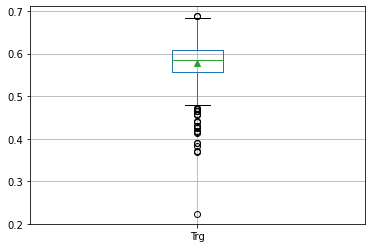

In [ ]:
std_df.boxplot(column='Trg', showmeans=True)

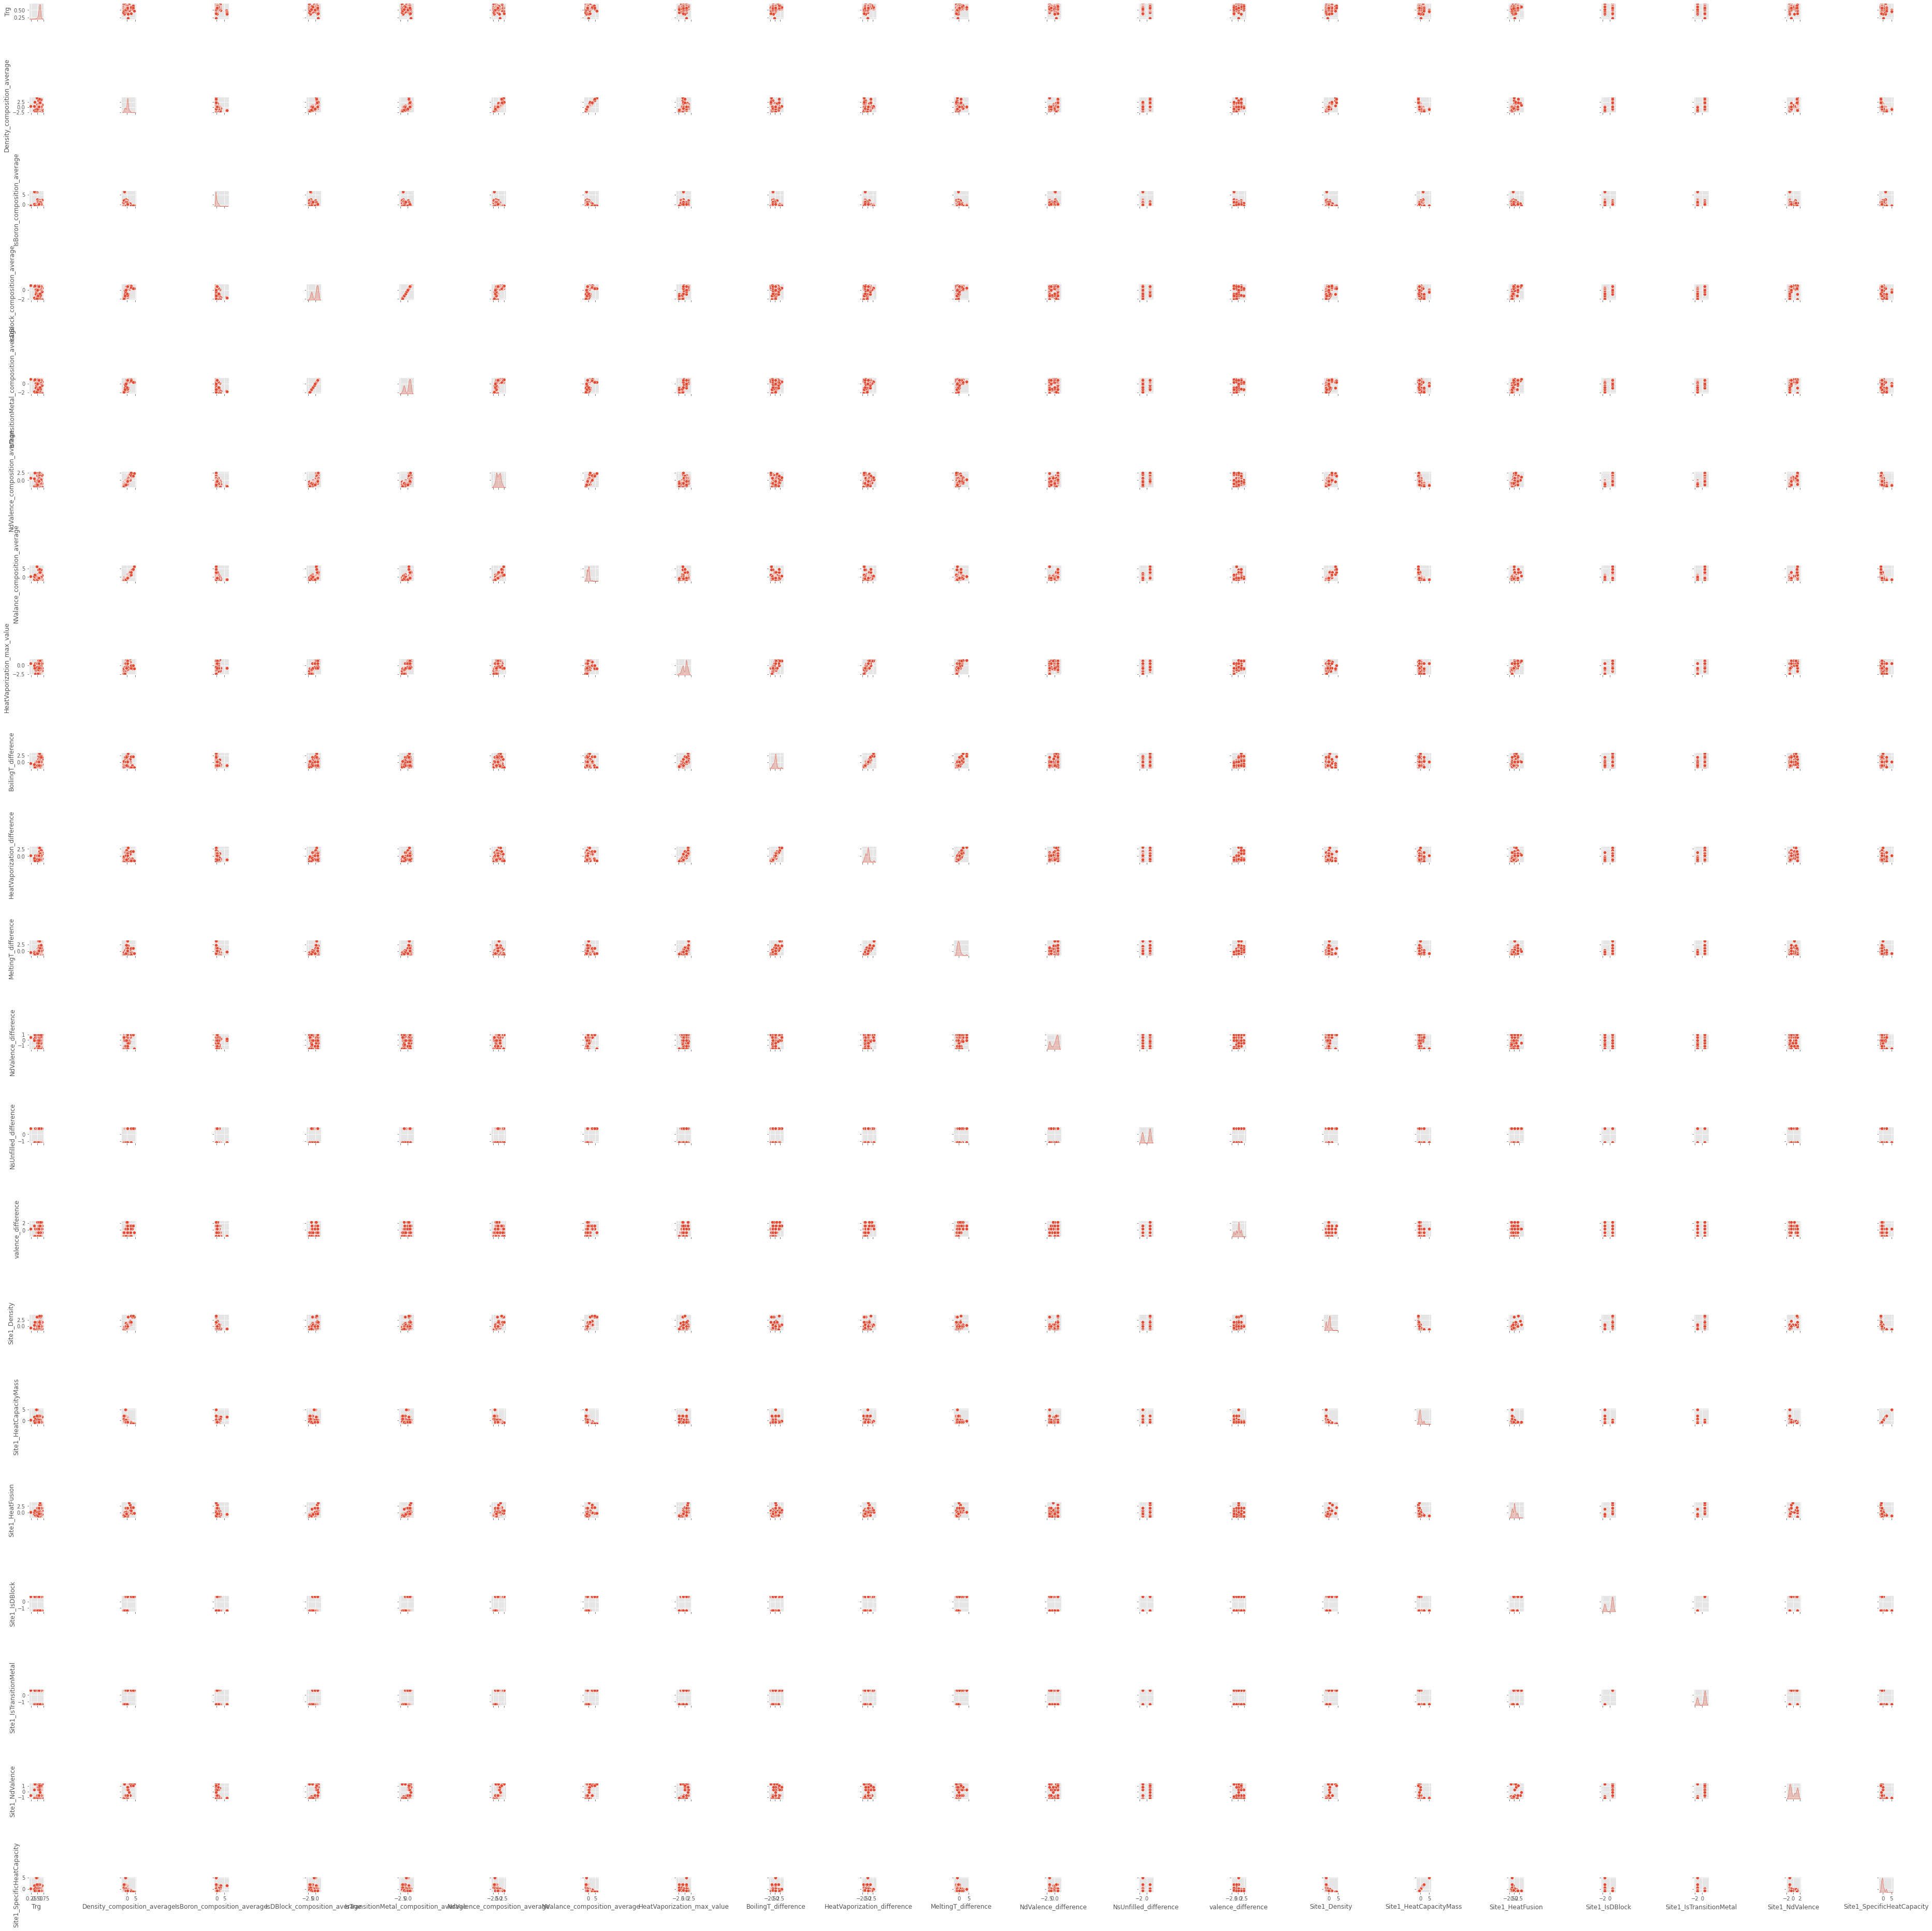

In [ ]:

sns.pairplot(std_df, diag_kind='kde')

In [ ]:
# Function to remove outliers based on IQR method

def remove_outliers(data):
    # IQR method is used to remove the outliers as the data is not assumed to be Gaussian-like

    # Calculate IQR
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    IQR = q75 - q25

    # Calculate outlier cut-off
    k_factor = 1.5
    cut_off = k_factor * IQR 
    lower_cut_off, upper_cut_off = q25 - cut_off, q75 + cut_off

    # Identiy outliers
    outliers = [x for x in data if x < lower_cut_off or x > upper_cut_off]
    print(f'Number of outliers: {len(outliers)}')

    # Remove outliers
    data_without_outliers = [x for x in data if x >= lower_cut_off or x <= upper_cut_off]

    return data_without_outliers

In [ ]:
y=pd.Series(std_df['Trg'])

y_without_outliers = remove_outliers(y)
size = len(y_without_outliers)

Number of outliers: 25


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Number of distributions in ALL_DISTRIBUTIONS: 86
Number of distributions in MY_DISTRIBUTIONS: 34
Number of bins used: 14


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:422: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarnin

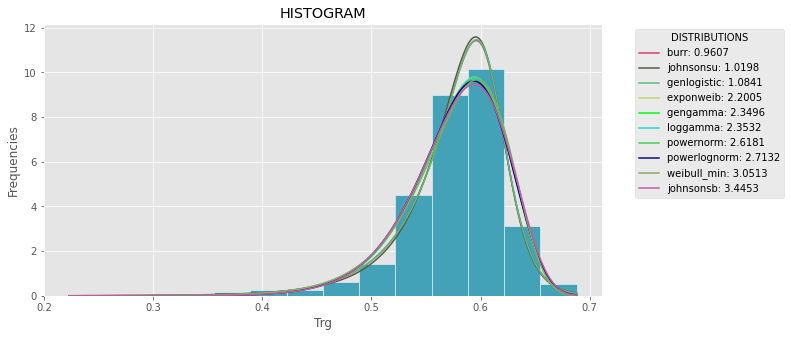

{<scipy.stats._continuous_distns.burr_gen object at 0x7f2fcc37f8d0>: [0.9607501100248338, (21408869.108235106, 0.3577760264292533), -306316.64374421135, 306317.2543947372, 1.5878161490285183, 0.999939814093345], <scipy.stats._continuous_distns.johnsonsu_gen object at 0x7f2fcbe2f6d0>: [1.0198033716194963, (1.0064500410168102, 1.5060767191377162), 0.6173925796346105, 0.04457687883451884, 0.7517201245145191, 0.9999993324355965], <scipy.stats._continuous_distns.genlogistic_gen object at 0x7f2fcbe749d0>: [1.084110523881326, (0.3522353388551336,), 0.6109540349049123, 0.014144730443141108, 1.5806975392150837, 0.999941368306579], <scipy.stats._continuous_distns.exponweib_gen object at 0x7f2fdfb535d0>: [2.2005963576402907, (1.4661067243164752, 3579345.9499965487), -164103.05693158595, 164103.64155816886, 6.395141083425787, 0.9305829050751409], <scipy.stats._continuous_distns.gengamma_gen object at 0x7f2fcbe81c50>: [2.349686529464062, (1.4925597454768709, 19087340.44555984), -901785.0968465674, 

,sse,arg,loc,scale,chi-square statistic,chi-square test p-value
johnsonsu,1.0198,"(1.0064500410168102, 1.5060767191377162)",0.617393,0.0445769,0.75172,0.999999
genlogistic,1.08411,"(0.3522353388551336,)",0.610954,0.0141447,1.5807,0.999941
burr,0.96075,"(21408869.108235106, 0.3577760264292533)",-306317,306317,1.58782,0.99994
tukeylambda,4.66839,"(-0.15801473167768132,)",0.583825,0.0192735,2.63546,0.998962
cauchy,8.70162,(),0.5862,0.0237481,2.76209,0.998665
gompertz,3.50466,"(5.087255682898403e-05,)",0.222924,0.0379699,2.77314,0.998636
gumbel_l,3.50345,(),0.598326,0.0379525,2.77995,0.998618
foldcauchy,8.43198,"(15.167654160421874,)",0.223,0.0239511,2.8323,0.998474
weibull_min,3.0513,"(40.316691377128166,)",-0.935405,1.53321,4.88941,0.977548
gengamma,2.34969,"(1.4925597454768709, 19087340.44555984)",-901785,901786,5.86402,0.950962


In [ ]:
# Source: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1
# The source code was modified by Tejas to perform chi-square test, get distribution names properly, and output the results in a pandas dataframe


import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

mpl.style.use("ggplot")

def danoes_formula(data):
    """
    DANOE'S FORMULA
    https://en.wikipedia.org/wiki/Histogram#Doane's_formula
    """
    N = len(data)
    skewness = st.skew(data)
    sigma_g1 = math.sqrt((6*(N-2))/((N+1)*(N+3)))
    num_bins = 1 + math.log(N,2) + math.log(1+abs(skewness)/sigma_g1,2)
    num_bins = round(num_bins)
    return num_bins

def plot_histogram(data, results, n, x_label):
    ## n first distribution of the ranking
    N_DISTRIBUTIONS = {k: results[k] for k in list(results)[:n]}

    ## Histogram of data
    plt.figure(figsize=(10, 5))
    plt.hist(data, density=True, bins=danoes_formula(data), ec='white', color=(63/235, 149/235, 170/235))
    plt.title('HISTOGRAM')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')

    ## Plot n distributions
    for distribution, result in N_DISTRIBUTIONS.items():
        print(distribution)
        sse = result[0]
        arg = result[1]
        loc = result[2]
        scale = result[3]
        x_plot = np.linspace(min(data), max(data), 1000)
        y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)

        # Get distribution name for legend
        left = 'scipy.stats._continuous_distns.'
        right = '_gen object at '
        distribution_str = str(distribution)
        distribution_name_in_legend = distribution_str[distribution_str.index(left)+len(left):distribution_str.index(right)]

        plt.plot(x_plot, y_plot, label=distribution_name_in_legend + ": " + str(sse)[0:6], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    
    plt.legend(title='DISTRIBUTIONS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(x_label)
    plt.show()

def fit_data(data):
    ## st.frechet_r,st.frechet_l: are disbled in current SciPy version
    ## st.levy_stable: a lot of time of estimation parameters
    ALL_DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    print(f'Number of distributions in ALL_DISTRIBUTIONS: {len(ALL_DISTRIBUTIONS)}')
    MY_DISTRIBUTIONS = [st.beta, st.cauchy, st.chi, st.chi2, st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,
                        st.exponweib,st.exponpow,st.f,st.fatiguelife, st.gamma, st.invgamma,st.invgauss,st.invweibull,st.johnsonsu,
                        st.laplace,
                        st.logistic,st.loggamma,st.loglaplace,st.lognorm, st.maxwell, st.norm,st.pareto, st.powerlognorm,st.powernorm,
                        st.rayleigh,st.rice, st.t, st.uniform, st.weibull_min,st.weibull_max]
    print(f'Number of distributions in MY_DISTRIBUTIONS: {len(MY_DISTRIBUTIONS)}')
    ## Calculae Histogram
    num_bins = danoes_formula(data)
    print(f'Number of bins used: {num_bins}')
    frequencies, bin_edges = np.histogram(data, num_bins, density=True)
    central_values = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

    results = {}
    for distribution in ALL_DISTRIBUTIONS:  # Change this to MY_DISTRIBUTIONS to check on the selected distributions
        ## Get parameters of distribution
        params = distribution.fit(data)
        
        ## Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
    
        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c, loc=loc, scale=scale, *arg) for c in central_values]
        
        ## Calculate SSE (sum of squared estimate of errors)
        sse = np.sum(np.power(frequencies - pdf_values, 2.0))

        #perform Chi-Square Goodness of Fit Test
        chi_square_statistic, chi_square_p_value = st.chisquare(f_obs=frequencies, f_exp=pdf_values)
        
        ## Build results and sort by sse
        results[distribution] = [sse, arg, loc, scale, chi_square_statistic, chi_square_p_value]

        
        
    results = {k: results[k] for k in sorted(results, key=results.get)}
    return results
        

## Import data
data = y_without_outliers
results = fit_data(data)
plot_histogram(data, results, 10, 'Trg')
print(results)
results_df_1 = pd.DataFrame.from_dict(results)

# Shorten the distribution names
short_column_names = []
left = 'scipy.stats._continuous_distns.'
right = '_gen object at '
for column_name in results_df_1.columns.values:
    column_name = str(column_name)
    short_column_name = column_name[column_name.index(left)+len(left):column_name.index(right)]
    short_column_names.append(short_column_name)
results_df_1.columns = short_column_names

results_df_2 = results_df_1.T
results_df_2.columns = ['sse', 'arg', 'loc', 'scale', 'chi-square statistic', 'chi-square test p-value']
display(results_df_2.round(4).sort_values(by='chi-square test p-value', ascending=False).head(10))

# Distribution names for plotting qq and pp plots later
sorted_distribution_names = short_column_names

    
    

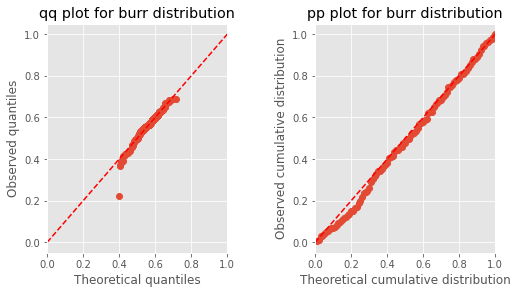

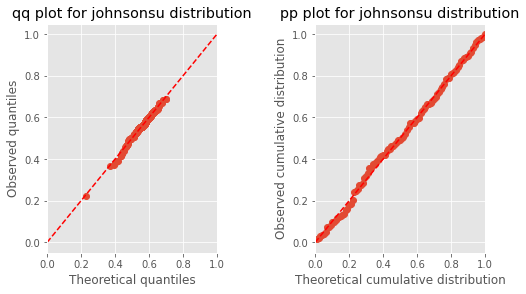

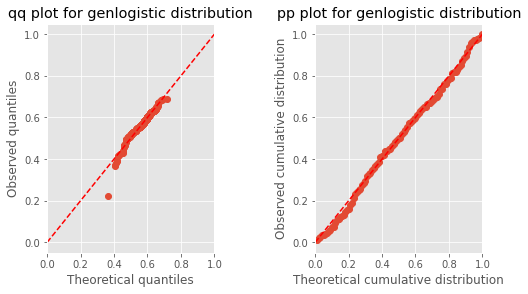

In [ ]:
## qq and pp plots
    
data = y_without_outliers
data.sort()
size = len(data)
dist_names = sorted_distribution_names

# Loop through selected distributions (as previously selected)

for distribution in dist_names[0:3]:
    # Set up distribution
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(data=data)
    
    # Get random numbers from distribution
    norm = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = size)
    norm.sort()
    
    # Create figure
    fig = plt.figure(figsize=(8,5)) 
    
    # qq plot
    ax1 = fig.add_subplot(121) # Grid of 2x2, this is suplot 1
    ax1.plot(norm,data,"o")
    min_value = np.floor(min(min(norm),min(data)))
    max_value = np.ceil(max(max(norm),max(data)))
    ax1.plot([min_value,max_value],[min_value,max_value],'r--')
    ax1.set_xlim(min_value,max_value)
    ax1.set_xlabel('Theoretical quantiles')
    ax1.set_ylabel('Observed quantiles')
    title = 'qq plot for ' + distribution +' distribution'
    ax1.set_title(title)
    
    # pp plot
    ax2 = fig.add_subplot(122)
    
    # Calculate cumulative distributions
    bins = np.percentile(norm,range(0,101))
    data_counts, bins = np.histogram(data,bins)
    norm_counts, bins = np.histogram(norm,bins)
    cum_data = np.cumsum(data_counts)
    cum_norm = np.cumsum(norm_counts)
    cum_data = cum_data / max(cum_data)
    cum_norm = cum_norm / max(cum_norm)
    
    # plot
    ax2.plot(cum_norm,cum_data,"o")
    min_value = np.floor(min(min(cum_norm),min(cum_data)))
    max_value = np.ceil(max(max(cum_norm),max(cum_data)))
    ax2.plot([min_value,max_value],[min_value,max_value],'r--')
    ax2.set_xlim(min_value,max_value)
    ax2.set_xlabel('Theoretical cumulative distribution')
    ax2.set_ylabel('Observed cumulative distribution')
    title = 'pp plot for ' + distribution +' distribution'
    ax2.set_title(title)
    
    # Display plot    
    plt.tight_layout(pad=4)
    plt.show()

In [ ]:
# Anderson darling test (My code)

distribution_names_list = ['norm', 'expon', 'gumbel_l', 'gumbel_r']

indices_list = ['statistic', 'critical value 1', 'critical value 2', 'critical value 3', 
                'critical value 4', 'critical value 5', 'significance level 1', 'significance level 2', 
                'significance level 3', 'significance level 4', 'significance level 5']
results_df = pd.DataFrame(columns=distribution_names_list, index=indices_list)


for i, distribution_name in enumerate(distribution_names_list):
    statistic, critical_values, significance_levels = st.anderson(y_without_outliers, dist=distribution_name)
    results_df.loc['statistic', distribution_name] = statistic

    for j in range(1, 1 + len(critical_values), 1):
        results_df.iloc[j, i] = critical_values[j-1]
    
    for k in range(6, 6 + len(significance_levels), 1):
        results_df.iloc[k, i] = significance_levels[k-6]
    print(statistic)
    print(critical_values)

display(results_df)

11.593591231186565
[0.572 0.652 0.782 0.912 1.085]
229.8291730174426
[0.921 1.077 1.34  1.604 1.955]
2.6968492000551123
[0.47  0.632 0.751 0.87  1.029]
58.91124385808416
[0.47  0.632 0.751 0.87  1.029]


,norm,expon,gumbel_l,gumbel_r
statistic,11.5936,229.829,2.69685,58.9112
critical value 1,0.572,0.921,0.47,0.47
critical value 2,0.652,1.077,0.632,0.632
critical value 3,0.782,1.34,0.751,0.751
critical value 4,0.912,1.604,0.87,0.87
critical value 5,1.085,1.955,1.029,1.029
significance level 1,15,15,25,25
significance level 2,10,10,10,10
significance level 3,5,5,5,5
significance level 4,2.5,2.5,2.5,2.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


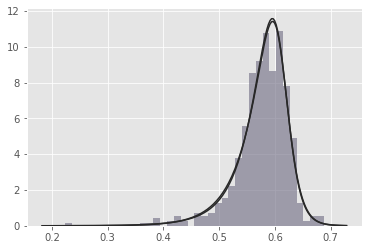

In [ ]:
sns.distplot(y_without_outliers, fit=st.burr, kde=False)
sns.distplot(y_without_outliers, fit=st.johnsonsu, kde=False)